In [60]:
# from https://github.com/HANTLUK/PauliDecomposition
import numpy as np
from TensorizedPauliDecomposition import PauliDecomposition
from qiskit.quantum_info import SparsePauliOp
import matplotlib.pyplot as plt
import time
import csv

In [61]:
def sparsePauliOeratorLCU(matrix):
	testResult2 = SparsePauliOp.from_operator(matrix)
	coeffs2 = testResult2.coeffs
	list2 = testResult2.paulis
	return [list2,coeffs2]

def tensorizedPauliDecompositionLCU(matrix):
	list1, coeffs1 = PauliDecomposition(matrix)
	return [list1,coeffs1]

def randomMatrix(dim):
	return np.add(np.random.rand(dim,dim),1.j*np.random.rand(dim,dim))

def comparison(method1, method2, matrix):
	start = time.time()
	list1,coeffs1 = method1(matrix)
	end = time.time()
	method1Time = end-start
	print (method1.__name__,"time:",method1Time)
	start = time.time()
	list2,coeffs2 = method2(matrix)
	end = time.time()
	method2Time = end-start
	print (method2.__name__,"time:",method2Time)
	equal = True
	for x,y in zip(list1,list2):
		if str(x) != str(y):
			equal = False
	eps = 10**(-5)
	for x,y in zip(coeffs1,coeffs2):
		if abs(complex(x) - complex(y)) > eps:
			equal = False
	return equal, method1Time, method2Time

In [62]:
tpdTimes, sparsePauliOpTimes = [],[]
qubits = 8

for i in range (1,qubits+1):
    print("qubits: ",i)
    testMatrix = randomMatrix(2**i)
    equal, method1, method2 = comparison(tensorizedPauliDecompositionLCU,sparsePauliOeratorLCU,testMatrix)
    print(equal)
    tpdTimes.append(method1)
    sparsePauliOpTimes.append(method2)

qubits:  1
tensorizedPauliDecompositionLCU time: 6.508827209472656e-05
sparsePauliOeratorLCU time: 0.0010650157928466797
True
qubits:  2
tensorizedPauliDecompositionLCU time: 0.00015306472778320312
sparsePauliOeratorLCU time: 0.0016748905181884766
True
qubits:  3
tensorizedPauliDecompositionLCU time: 0.000560760498046875
sparsePauliOeratorLCU time: 0.003615140914916992
True
qubits:  4
tensorizedPauliDecompositionLCU time: 0.002079010009765625
sparsePauliOeratorLCU time: 0.010983943939208984
True
qubits:  5
tensorizedPauliDecompositionLCU time: 0.006783962249755859
sparsePauliOeratorLCU time: 0.044397592544555664
True
qubits:  6
tensorizedPauliDecompositionLCU time: 0.025484085083007812
sparsePauliOeratorLCU time: 0.8558399677276611
True
qubits:  7
tensorizedPauliDecompositionLCU time: 0.14013004302978516
sparsePauliOeratorLCU time: 11.732931137084961
True
qubits:  8
tensorizedPauliDecompositionLCU time: 0.42709922790527344


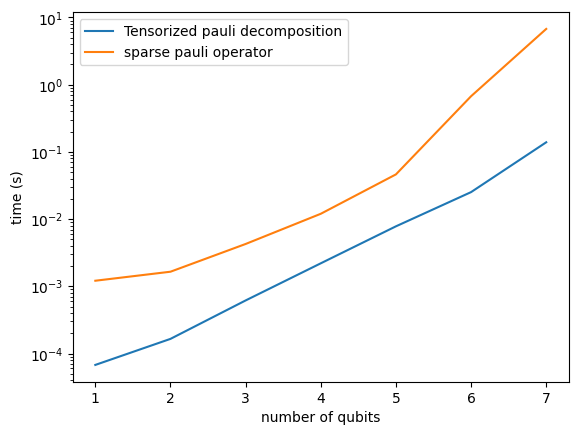

In [ ]:
plt.plot(tpdTimes, label = "Tensorized pauli decomposition")
plt.plot(sparsePauliOpTimes, label = "sparse pauli operator")
plt.xlabel("number of qubits")
plt.ylabel("time (s)")
plt.yscale('log')
plt.xticks(np.arange(qubits),np.arange(1,qubits+1))
ax = plt.gca()
plt.legend()

In [ ]:
with open('resultsLCU.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Number of qubits","Tensorized Pauli Decomposition", "Sparse Pauli Operator"])
    for i in range(qubits):
        writer.writerow([i+1,tpdTimes[i], sparsePauliOpTimes[i]])